# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn.linear_model import LinearRegression


# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

homeFldr = '/content/drive/MyDrive/Colab Notebooks/02_ML/'

# Code to read the data
currFldr = 'Project_ML/'
fileFldr = homeFldr + currFldr
print(fileFldr)
data = pd.read_csv(fileFldr + "Loan_Modelling.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/02_ML/Project_ML/


ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Data Overview

In [ ]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
4995  4996   29           3      40    92697       1 1.90000          3   
4996  4997   30           4      15    92037       4 0.40000          1   
4997  4998   63          39      24    93023       2 0.30000          3   
4998  4999   65          40      49    90034       3 0.50000          2   
4999  5000   28           4      83    92612       3 0.80000          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
data.sample(20)

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
1447  1448   52          28     145    94131       2 6.80000          1   
1814  1815   48          22      79    95747       3 0.70000          2   
293    294   45          19      93    90095       4 2.60000          3   
3997  3998   62          38      80    94545       4 1.70000          2   
1930  1931   56          29      51    94080       3 1.00000          2   
3295  3296   42          16     141    94960       3 4.00000          2   
3317  3318   65          41      79    90035       3 2.00000          3   
743    744   61          37      40    94539       4 2.20000          1   
1985  1986   31           7      31    94920       4 0.40000          2   
945    946   57          32      33    91745       1 1.50000          2   
2887  2888   40          16     109    94025       2 2.20000          1   
980    981   38          13     114    92697       1 1.00000          3   
2778  2779   56          31      61    92646       4 1.30000          3   
4451  4452   67          41      18    92130       2 0.40000          1   
1720  1721   52          28       8    95060       1 0.30000          1   
334    335   48          23      45    95053       1 1.30000          2   
1328  1329   60          36     145    95616       4 6.90000          1   
904    905   28           2      51    90503       4 1.80000          2   
893    894   58          32      43    93943       3 1.40000          1   
4987  4988   48          23      43    93943       3 1.70000          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1447         0              0                   0           0       1   
1814         0              0                   0           0       1   
293          0              0                   0           0       0   
3997         0              0                   0           0       0   
1930         0              0                   0           0       1   
3295         0              1                   0           0       0   
3317         0              0                   0           0       0   
743          0              0                   1           1       1   
1985        79              0                   0           0       0   
945          0              0                   0           0       1   
2887         0              0                   0           0       1   
980          0              0                   0           0       1   
2778         0              0                   0           0       1   
4451         0              0                   0           0       1   
1720         0              0                   0           0       1   
334          0              0                   0           0       1   
1328       380              1                   0           0       0   
904          0              0                   1           0       0   
893          0              0                   0           0       0   
4987       159              0                   0           0       1   

      CreditCard  
1447           0  
1814           0  
293            0  
3997           0  
1930           0  
3295           0  
3317           0  
743            1  
1985           0  
945            0  
2887           0  
980            1  
2778           1  
4451           0  
1720           0  
334            0  
1328           1  
904            0  
893            1  
4987           0

In [ ]:
#Understaning the shape of the dataset
data.shape

(5000, 14)

5000 rows and 14 columns

In [ ]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All datatypes are numeric, no object datatypes

In [ ]:
# Check for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64



*   There are no null values in the dataset



In [ ]:
# checking for duplicate values
data[data.duplicated()]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

* There are no duplicate values in the data.

### Statistical Summary of the data

In [ ]:
data.describe().T

count        mean        std         min         25%  \
ID                 5000.00000  2500.50000 1443.52000     1.00000  1250.75000   
Age                5000.00000    45.33840   11.46317    23.00000    35.00000   
Experience         5000.00000    20.10460   11.46795    -3.00000    10.00000   
Income             5000.00000    73.77420   46.03373     8.00000    39.00000   
ZIPCode            5000.00000 93169.25700 1759.45509 90005.00000 91911.00000   
Family             5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg              5000.00000     1.93794    1.74766     0.00000     0.70000   
Education          5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage           5000.00000    56.49880  101.71380     0.00000     0.00000   
Personal_Loan      5000.00000     0.09600    0.29462     0.00000     0.00000   
Securities_Account 5000.00000     0.10440    0.30581     0.00000     0.00000   
CD_Account         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online             5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard         5000.00000     0.29400    0.45564     0.00000     0.00000   

                           50%         75%         max  
ID                  2500.50000  3750.25000  5000.00000  
Age                   45.00000    55.00000    67.00000  
Experience            20.00000    30.00000    43.00000  
Income                64.00000    98.00000   224.00000  
ZIPCode            93437.00000 94608.00000 96651.00000  
Family                 2.00000     3.00000     4.00000  
CCAvg                  1.50000     2.50000    10.00000  
Education              2.00000     3.00000     3.00000  
Mortgage               0.00000   101.00000   635.00000  
Personal_Loan          0.00000     0.00000     1.00000  
Securities_Account     0.00000     0.00000     1.00000  
CD_Account             0.00000     0.00000     1.00000  
Online                 1.00000     1.00000     1.00000  
CreditCard             0.00000     1.00000     1.00000

1. min and the max age of customers are 23 and 67
2. experience ranges from -3 to 43 years. This column can be potentially cleaned up. Check for negetive numbers



### Adding some generic functions for plotting

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

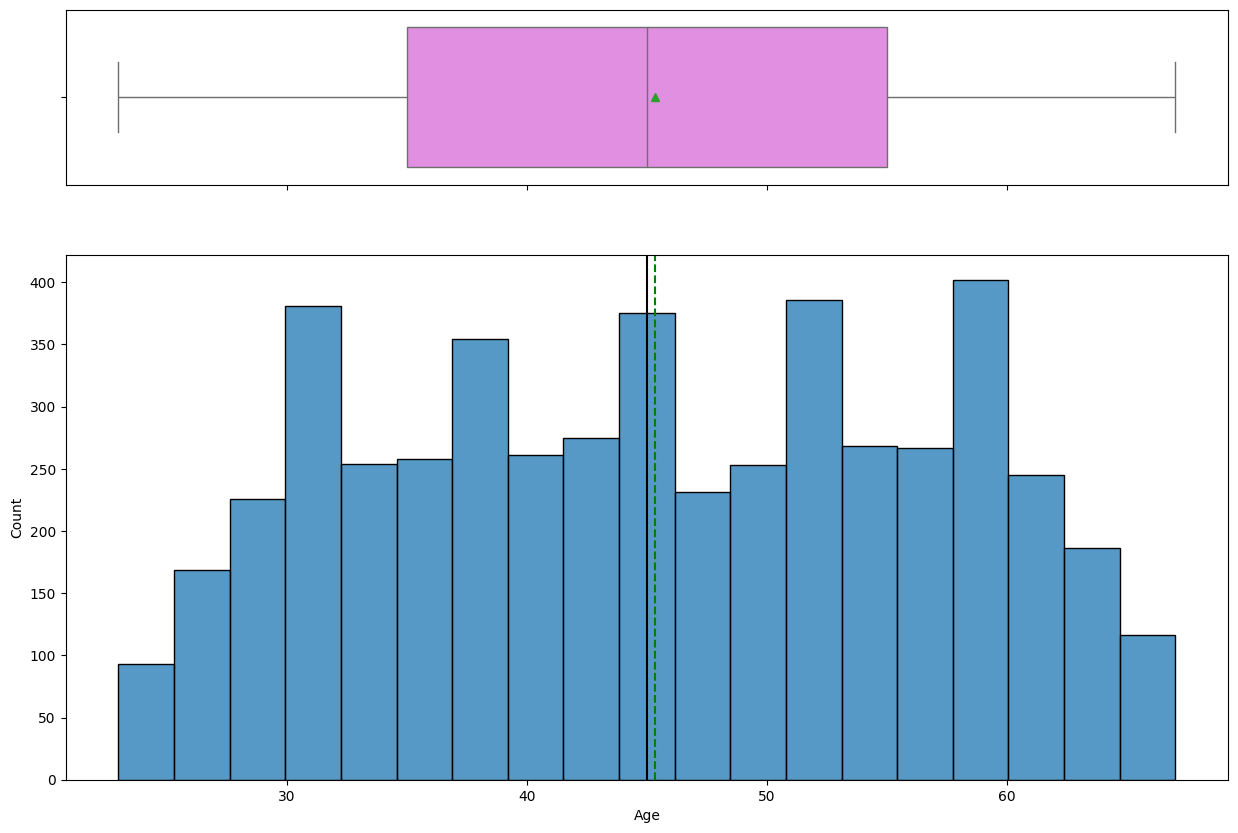

In [ ]:
histogram_boxplot(data, "Age")

no outliers for age, all adult age customers

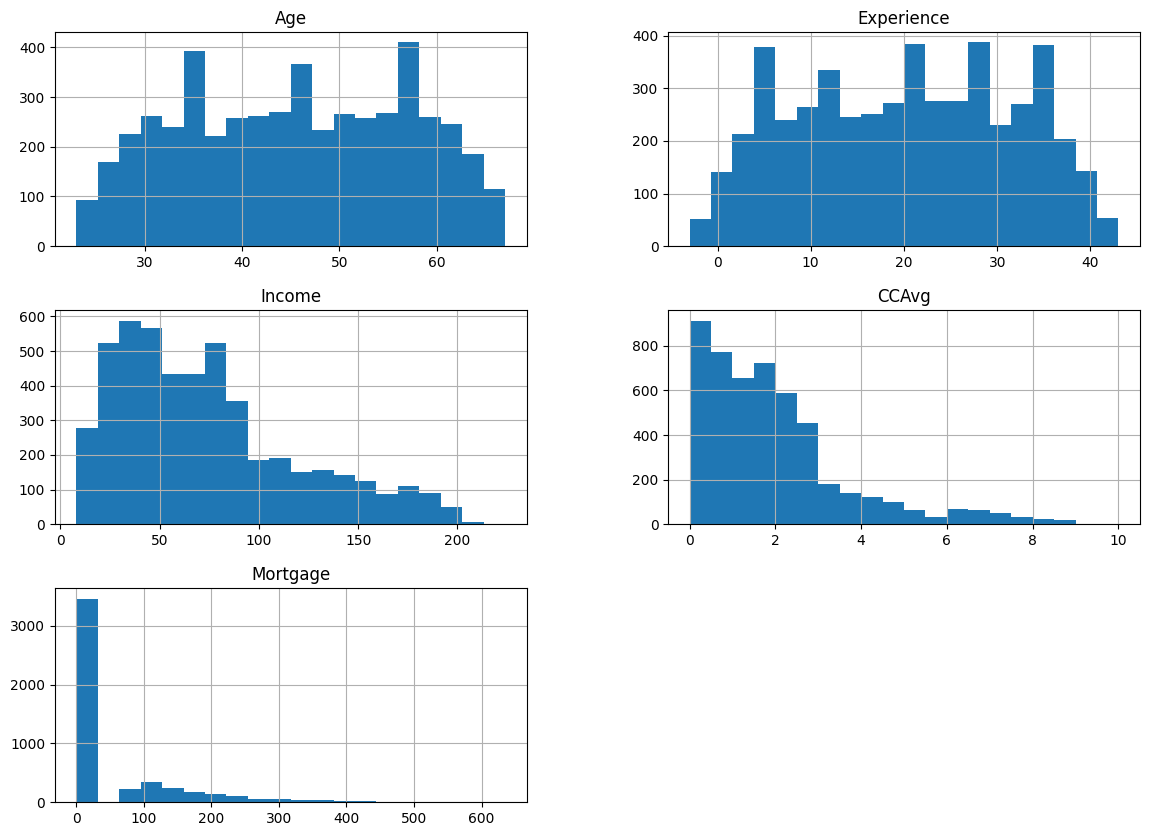

In [ ]:
# Univariate Analysis
# Histograms for continuous variables
data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].hist(bins=20, figsize=(14,10))
plt.show()

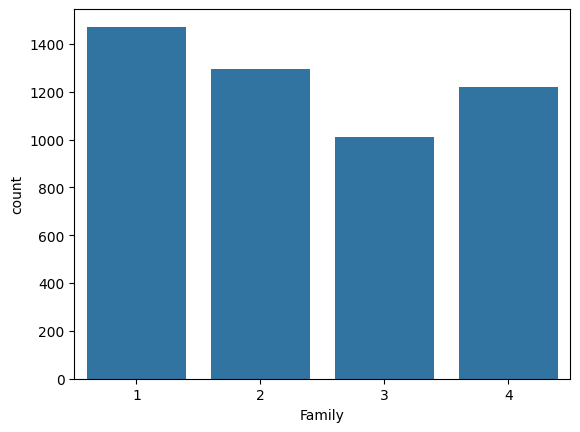

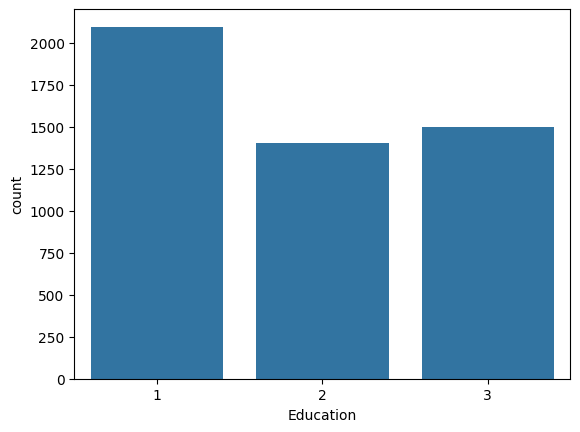

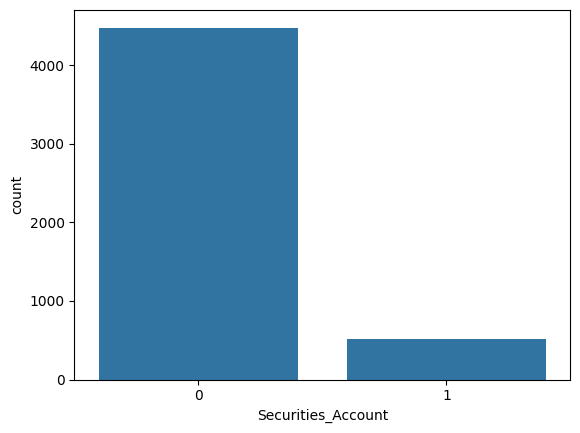

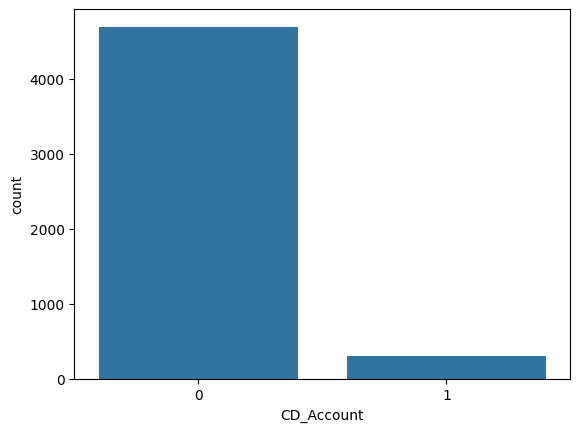

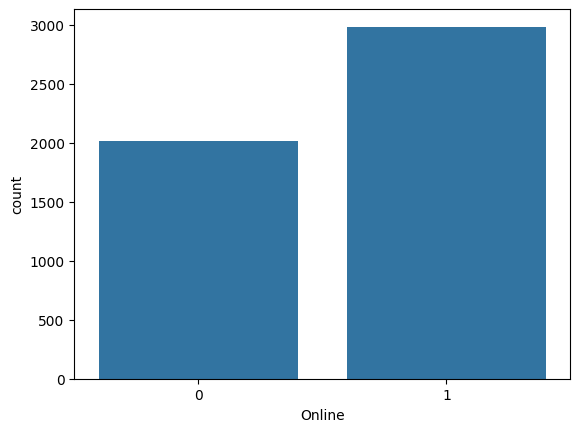

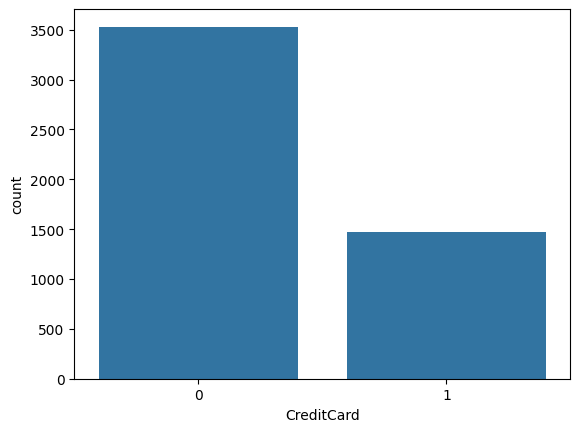

In [ ]:
# Bar Charts for categorical variables
categorical_vars = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for var in categorical_vars:
    sns.countplot(x=var, data=data)
    plt.show()

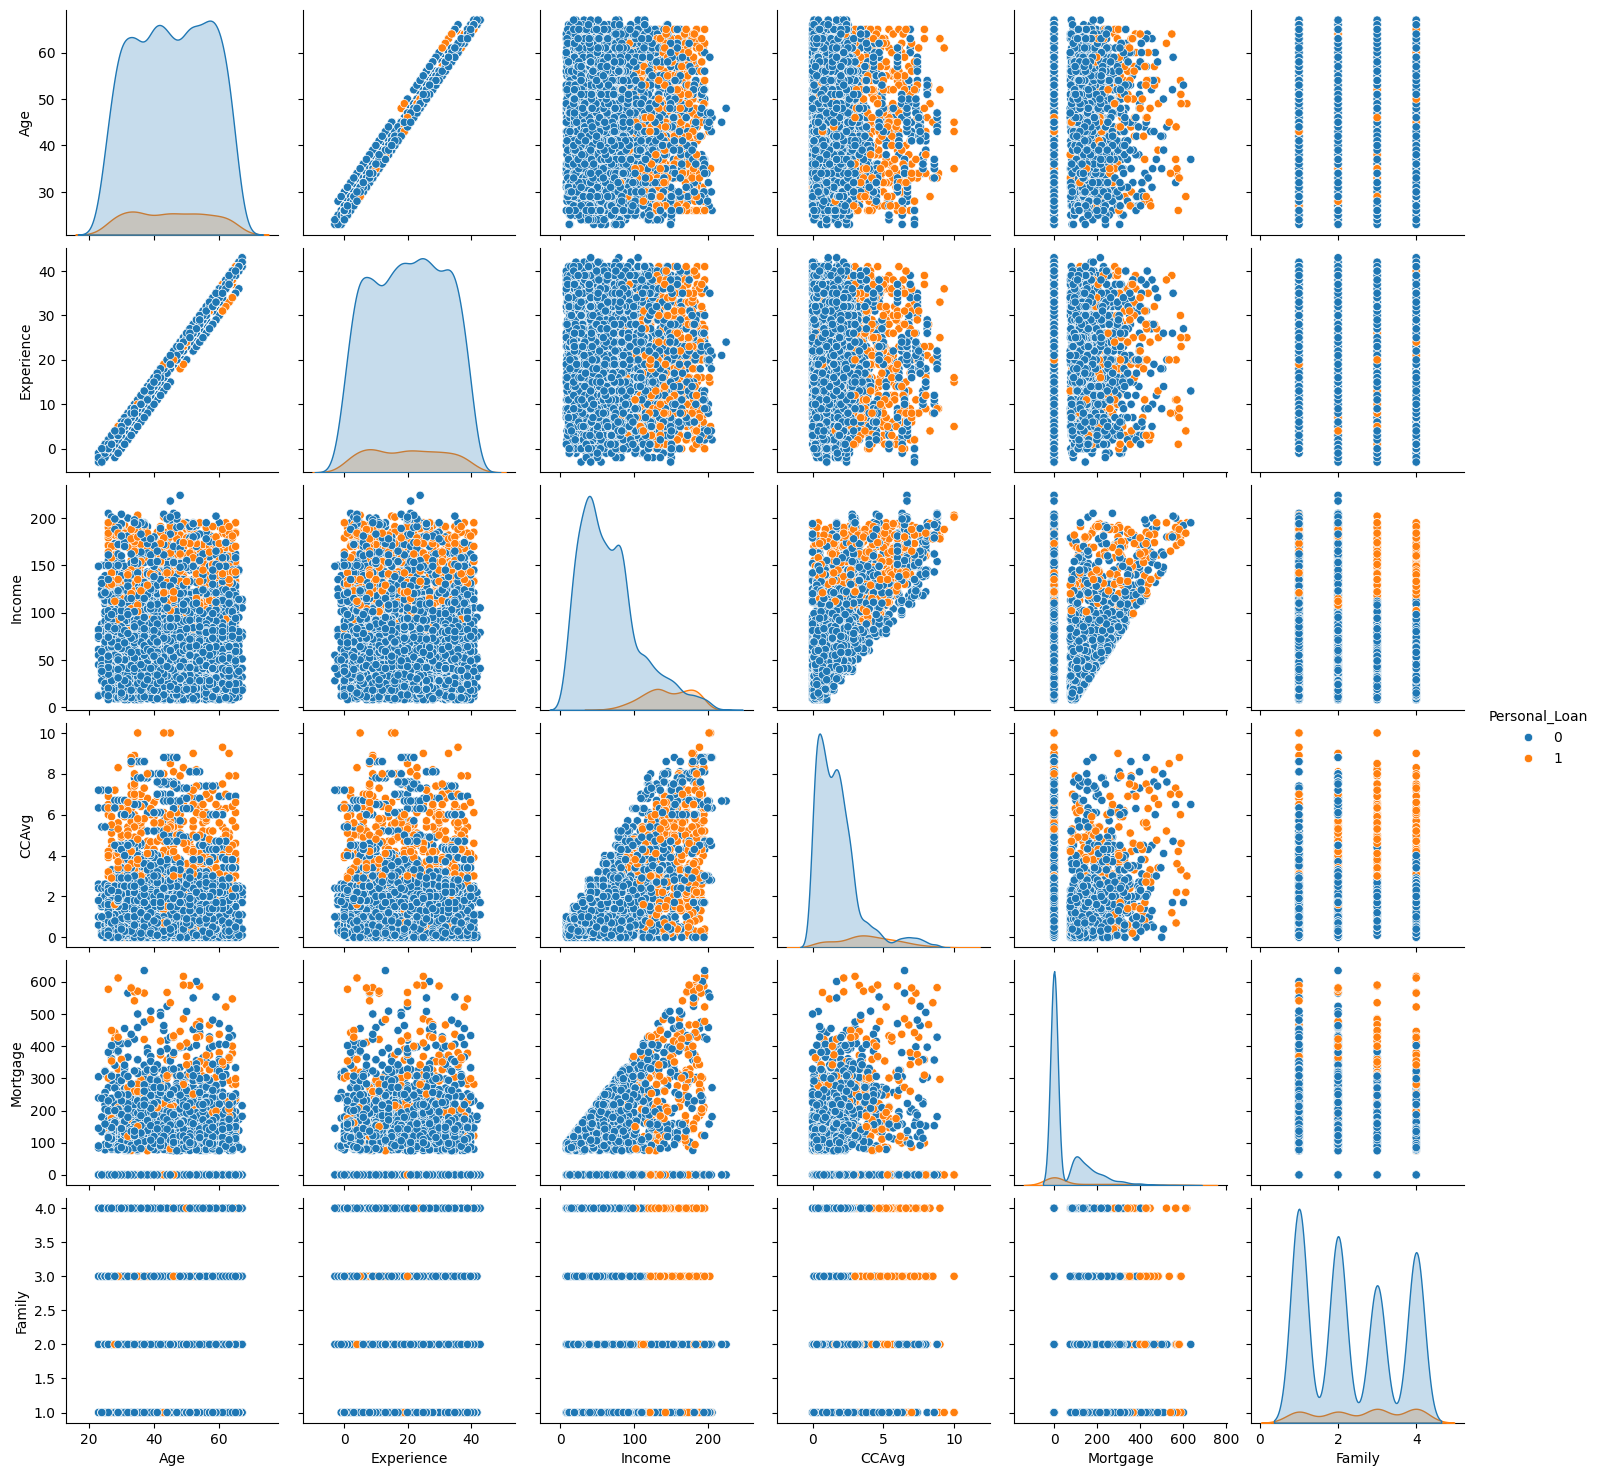

In [ ]:
# Scatter Plots
sns.pairplot(data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan', 'Family']], hue='Personal_Loan')
plt.show()

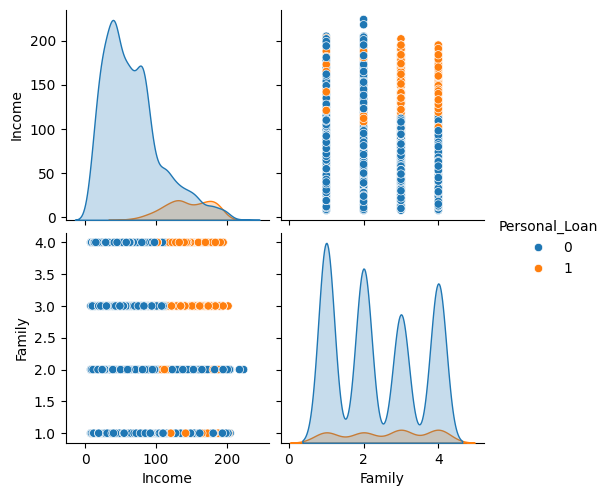

In [ ]:
# Scatter Plots
sns.pairplot(data[['Income', 'Personal_Loan', 'Family']], hue='Personal_Loan')
plt.show()

#### Summary
* Income: There is a clear pattern where higher income individuals are more likely to accept personal loans.
* Family Size: We can also see that family with 3 or 4 members and where income is over $120K, there is a chance of accepting personal loan

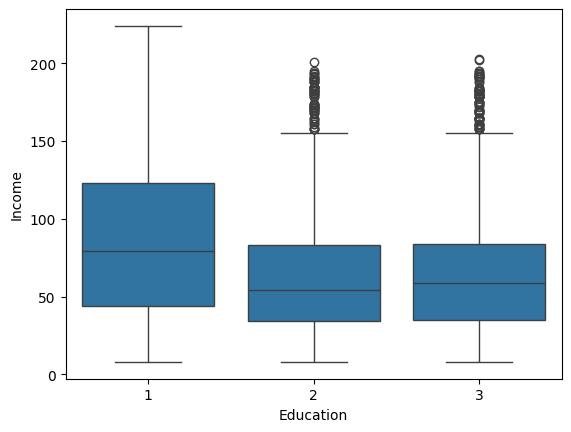

In [ ]:
# Box Plots by Category
sns.boxplot(x='Education', y='Income', data=data)
plt.show()

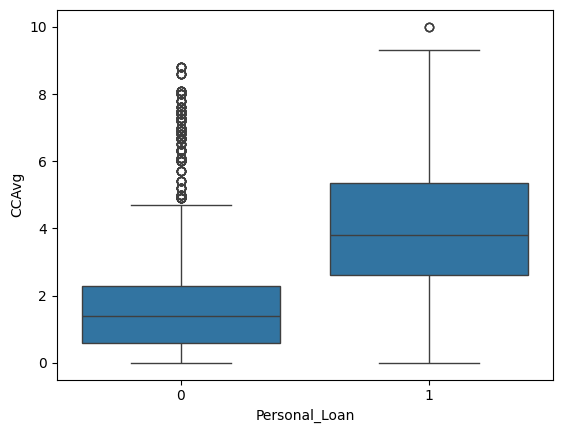

In [ ]:
sns.boxplot(x='Personal_Loan', y='CCAvg', data=data)
plt.show()

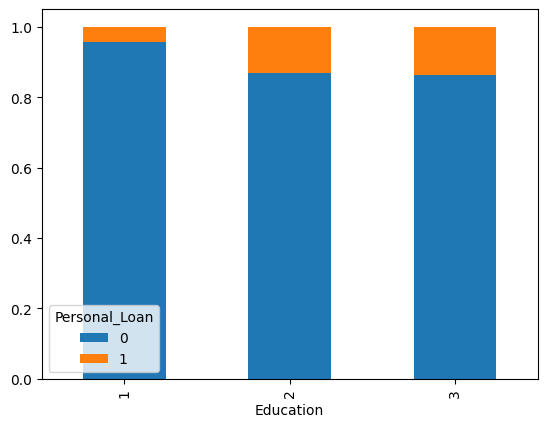

In [ ]:
# Stacked Bar Charts
education_personal_loan = pd.crosstab(data['Education'], data['Personal_Loan'])
education_personal_loan.div(education_personal_loan.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

* Clearly customer who are graduates and advanced professionals are accepting personal loans

In [ ]:
# Chi-Square Test
from scipy.stats import chi2_contingency

for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['Personal_Loan'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {var} vs Personal_Loan:')
    print(f'Chi2: {chi2}, p-value: {p}\n')

Chi-square test for Family vs Personal_Loan:
Chi2: 29.676116414854746, p-value: 1.6144121228248757e-06

Chi-square test for Education vs Personal_Loan:
Chi2: 111.2398718738913, p-value: 6.991473868665428e-25

Chi-square test for Securities_Account vs Personal_Loan:
Chi2: 2.172310545186504, p-value: 0.14051497326319357

Chi-square test for CD_Account vs Personal_Loan:
Chi2: 495.90424218782334, p-value: 7.398297503329848e-110

Chi-square test for Online vs Personal_Loan:
Chi2: 0.15600672120524922, p-value: 0.6928599643141484

Chi-square test for CreditCard vs Personal_Loan:
Chi2: 0.021144453920855056, p-value: 0.8843861223314504



#### Intepretation of the results:

1. Family vs Personal_Loan: The p-value is very small (< 0.05), indicating a significant association between Family and Personal_Loan.

2. Education vs Personal_Loan: The p-value is extremely small (< 0.05), indicating a very strong association between Education and Personal_Loan.

3. Securities_Account vs Personal_Loan: The p-value is greater than 0.05, indicating **NO** significant association between Securities_Account and Personal_Loan.

4. CD_Account vs Personal_Loan: The p-value is extremely small (< 0.05), indicating a very strong association between CD_Account and Personal_Loan.

5. Online vs Personal_Loan: The p-value is greater than 0.05, indicating **NO** significant association between Online and Personal_Loan.

6. CreditCard vs Personal_Loan: The p-value is greater than 0.05, indicating **NO** significant association between CreditCard and Personal_Loan.

These results suggest that the variables Family, Education, and CD_Account might be important predictors for whether a customer will accept a personal loan, while the other variables might not be as influential.

### Answering questions in the project
1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

#### Distribution of Mortage attribute:

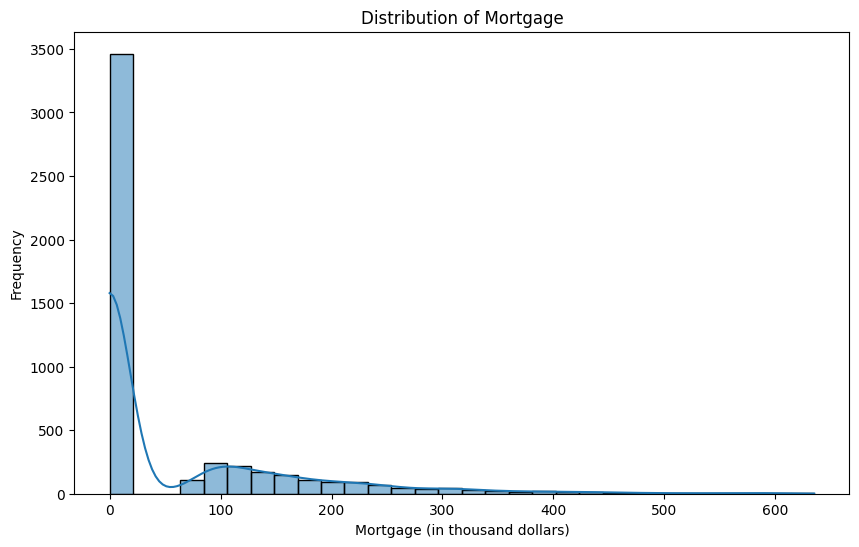

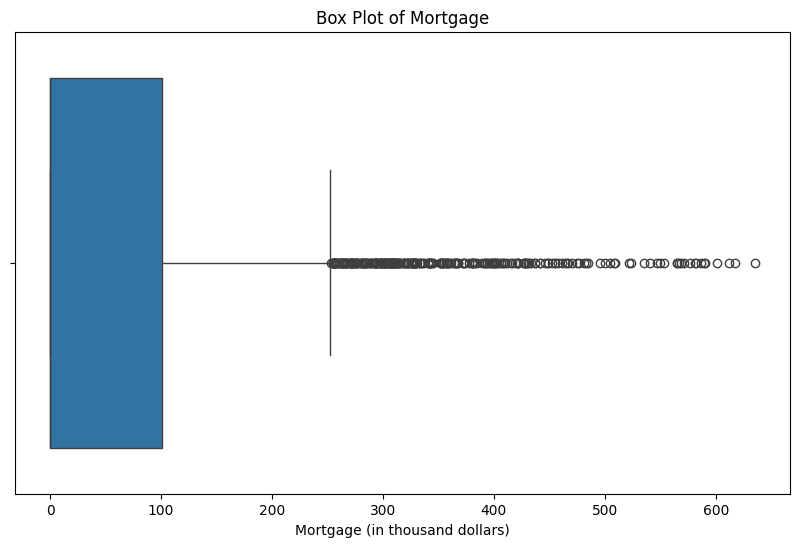

In [ ]:
# Histogram for Mortgage
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Mortgage
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Mortgage'])
plt.title('Box Plot of Mortgage')
plt.xlabel('Mortgage (in thousand dollars)')
plt.show()

#### Number of customers with credit cards

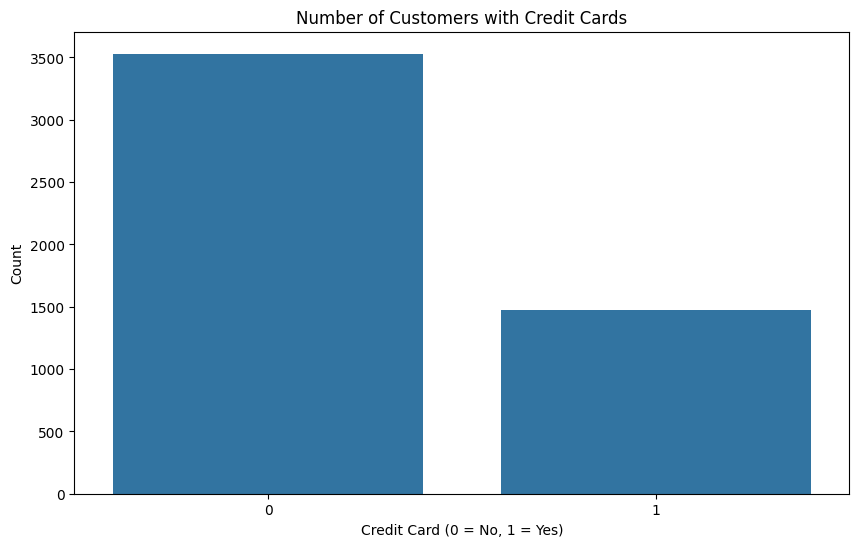

Total number of customers with credit cards: 1470


In [ ]:
# Count Plot for Credit Card usage
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditCard', data=data)
plt.title('Number of Customers with Credit Cards')
plt.xlabel('Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Number of customers with credit cards
num_customers_with_credit_cards = data['CreditCard'].sum()
print(f'Total number of customers with credit cards: {num_customers_with_credit_cards}')


#### Attributes strongly Correlated with Personal Loan

Personal_Loan         1.00000
Income                0.50246
CCAvg                 0.36689
CD_Account            0.31635
Mortgage              0.14210
Education             0.13672
Family                0.06137
Securities_Account    0.02195
Online                0.00628
CreditCard            0.00280
ZIPCode              -0.00297
Experience           -0.00741
Age                  -0.00773
ID                   -0.02480
Name: Personal_Loan, dtype: float64


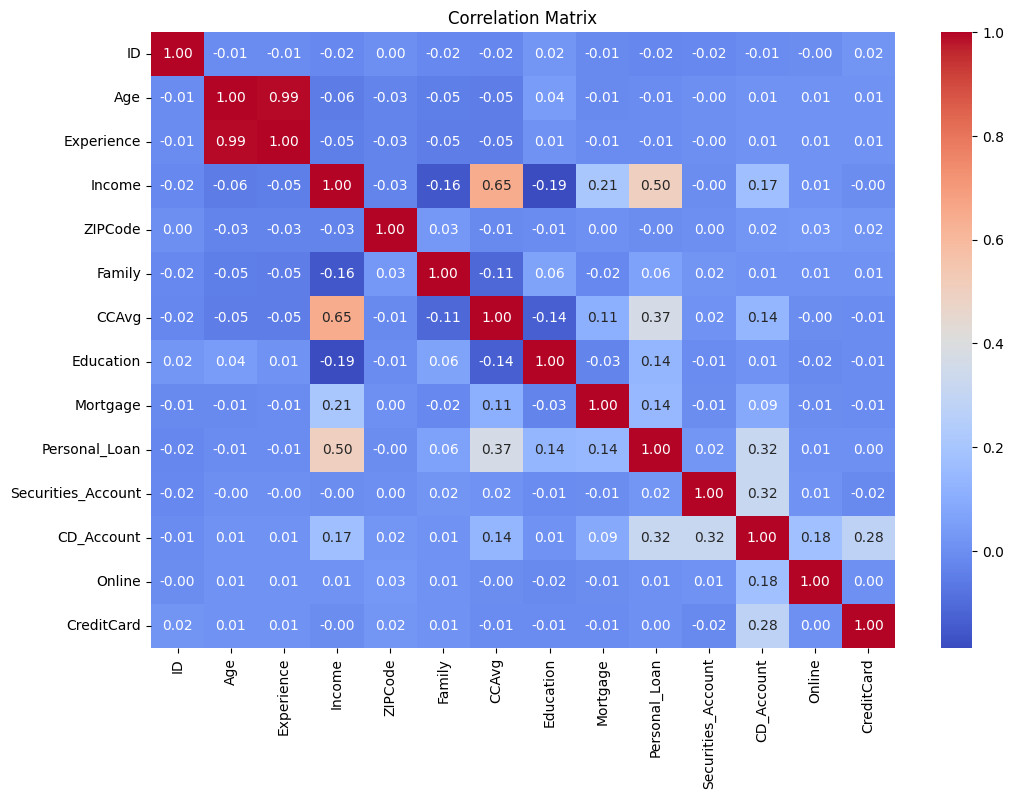

In [ ]:
# Correlation Matrix
correlation_matrix = data.corr()

# Filter correlations with Personal_Loan
personal_loan_corr = correlation_matrix['Personal_Loan'].sort_values(ascending=False)
print(personal_loan_corr)

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Summary

* Personal_Loan and CCAvg, suggesting that customers who spend more on credit cards are more likely to accept personal loans.

* There is a moderate positive correlation between having a CD account and accepting a personal loan, indicating that customers with CD accounts may be more inclined to accept personal loans.

* There is a weak positive correlation between Education and Personal_Loan, suggesting that higher education levels might have a slight influence on accepting personal loans.

* Strong Correlations: Experience and Age, Income and CCAvg.

* Moderate Correlations: Income and Personal_Loan, CCAvg and Personal_Loan, CD_Account and Personal_Loan.

* Weak Correlations: Education and Personal_Loan, Mortgage and Personal_Loan.

#### Customer's Interest in Purchasing a Loan vs. Age

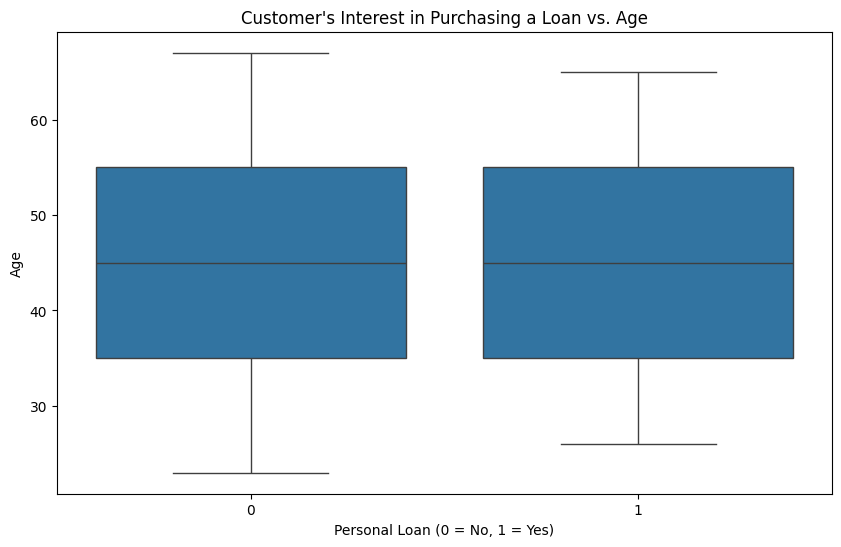

In [ ]:
# Box Plot for Age and Personal Loan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title("Customer's Interest in Purchasing a Loan vs. Age")
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


#### Customer's Interest in Purchasing a Loan vs. Education

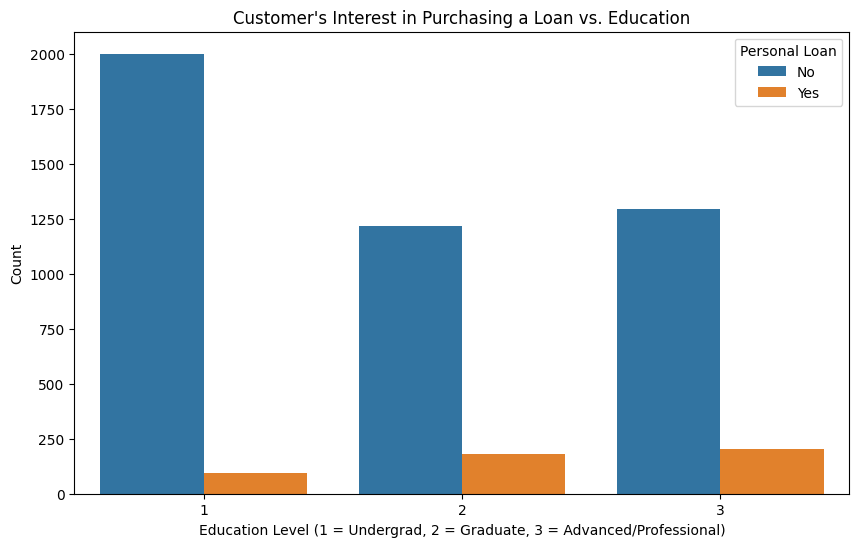

In [ ]:
# Bar Plot for Education and Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title("Customer's Interest in Purchasing a Loan vs. Education")
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', loc='upper right', labels=['No', 'Yes'])
plt.show()


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
X = data.drop(["Personal_Loan", "ID"], axis=1)
y = data["Personal_Loan"]

In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   25           1      49    91107       4 1.60000          1         0   
1   45          19      34    90089       3 1.50000          1         0   
2   39          15      11    94720       1 1.00000          1         0   
3   35           9     100    94112       1 2.70000          2         0   
4   35           8      45    91330       4 1.00000          2         0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

* There is no one-hot encoding done in this dataset as all the variables are numeric
* Regarding Education: The encoded value representing the customer's education level. If this was a categorical variable with levels (1, 2, 3), it would have been transformed into multiple binary columns, but since it's a numerical representation already, it stays as is.

## Creating train and test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 2000


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0   0.90433
1   0.09567
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90350
1   0.09650
Name: proportion, dtype: float64


* Class Imbalance: Both the training and test sets exhibit a significant class imbalance. The proportion of customers who did not accept the personal loan (class 0) is much higher than those who did (class 1).

* However, the class distributions in the training and test sets are very similar, which is good for the model evaluation as it suggests that the split was done properly and that the test set is representative of the training set.

## Model Building - Decision Tree Model

### Build Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

* Accuracy: The model has an accuracy of 1.00000 (100%). This means that the model correctly classified all instances in the training set.
* Recall: The recall is 1.00000 (100%) for both classes. This means that the model correctly identified all positive and negative instances without any false negatives.
* Precision: The precision is also 1.00000 (100%) for both classes, indicating that there are no false positives.
* F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 1.00000 (100%).

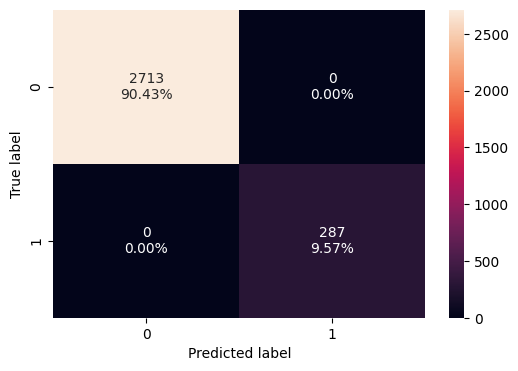

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

The confusion matrix visualizes the performance of the classification model:

* True Negatives (TN): 2713 instances (90.43%) - These are the customers who did not accept the personal loan and were correctly identified by the model.
* True Positives (TP): 287 instances (9.57%) - These are the customers who accepted the personal loan and were correctly identified by the model.
* False Negatives (FN): 0 instances (0%) - There are no customers who accepted the personal loan but were incorrectly classified as non-acceptors by the model.
* False Positives (FP): 0 instances (0%) - There are no customers who did not accept the personal loan but were incorrectly classified as acceptors by the model.

* Potential Overfitting: Given the perfect scores on the training set, there is a high likelihood that the model might be overfitting the training data. Overfitting occurs when a model performs extremely well on the training data but fails to generalize to unseen test data. So lets check the matrices on test data now.

### Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.97800 0.86528    0.90270 0.88360

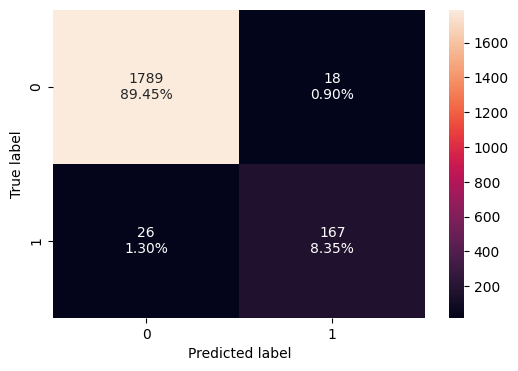

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

#### Performance Metrics
* Accuracy: The model has an accuracy of 0.97800 (97.8%). This means that the model correctly classified 97.8% of the instances in the test set.
* Recall: The recall is 0.86528 (86.5%). This indicates that the model correctly identified 86.5% of the positive instances (those who accepted the personal loan).
* Precision: The precision is 0.90270 (90.3%). This indicates that 90.3% of the instances predicted as positive (those predicted to accept the personal loan) were actually positive.
* F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 0.88360 (88.4%). This provides a balance between precision and recall.

#### Confusion Matrix

* True Negatives (TN): 1789 instances (89.45%) - These are customers who did not accept the personal loan and were correctly identified by the model.
* True Positives (TP): 167 instances (8.35%) - These are customers who accepted the personal loan and were correctly identified by the model.
* False Negatives (FN): 26 instances (1.30%) - These are customers who accepted the personal loan but were incorrectly classified as non-acceptors by the model.
* False Positives (FP): 18 instances (0.90%) - These are customers who did not accept the personal loan but were incorrectly classified as acceptors by the model.

#### Interpretation
* High Accuracy: The model maintains a high accuracy of 97.8%, indicating that it performs well on the test set.
* Good Recall: With a recall of 86.5%, the model is effective at identifying most of the customers who accepted the personal loan, although it missed 13.5% of them.
* High Precision: A precision of 90.3% indicates that the majority of the customers predicted to accept the loan actually did accept it, with only 9.7% being false positives.
* Balanced F1 Score: The F1 score of 88.4% shows a good balance between precision and recall, suggesting that the model is well-tuned for both metrics.

Overall, the model performs well on the test set, with a high accuracy and balanced precision and recall. This indicates that the model generalizes well to unseen data, effectively predicting customer behavior regarding personal loan acceptance.

### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


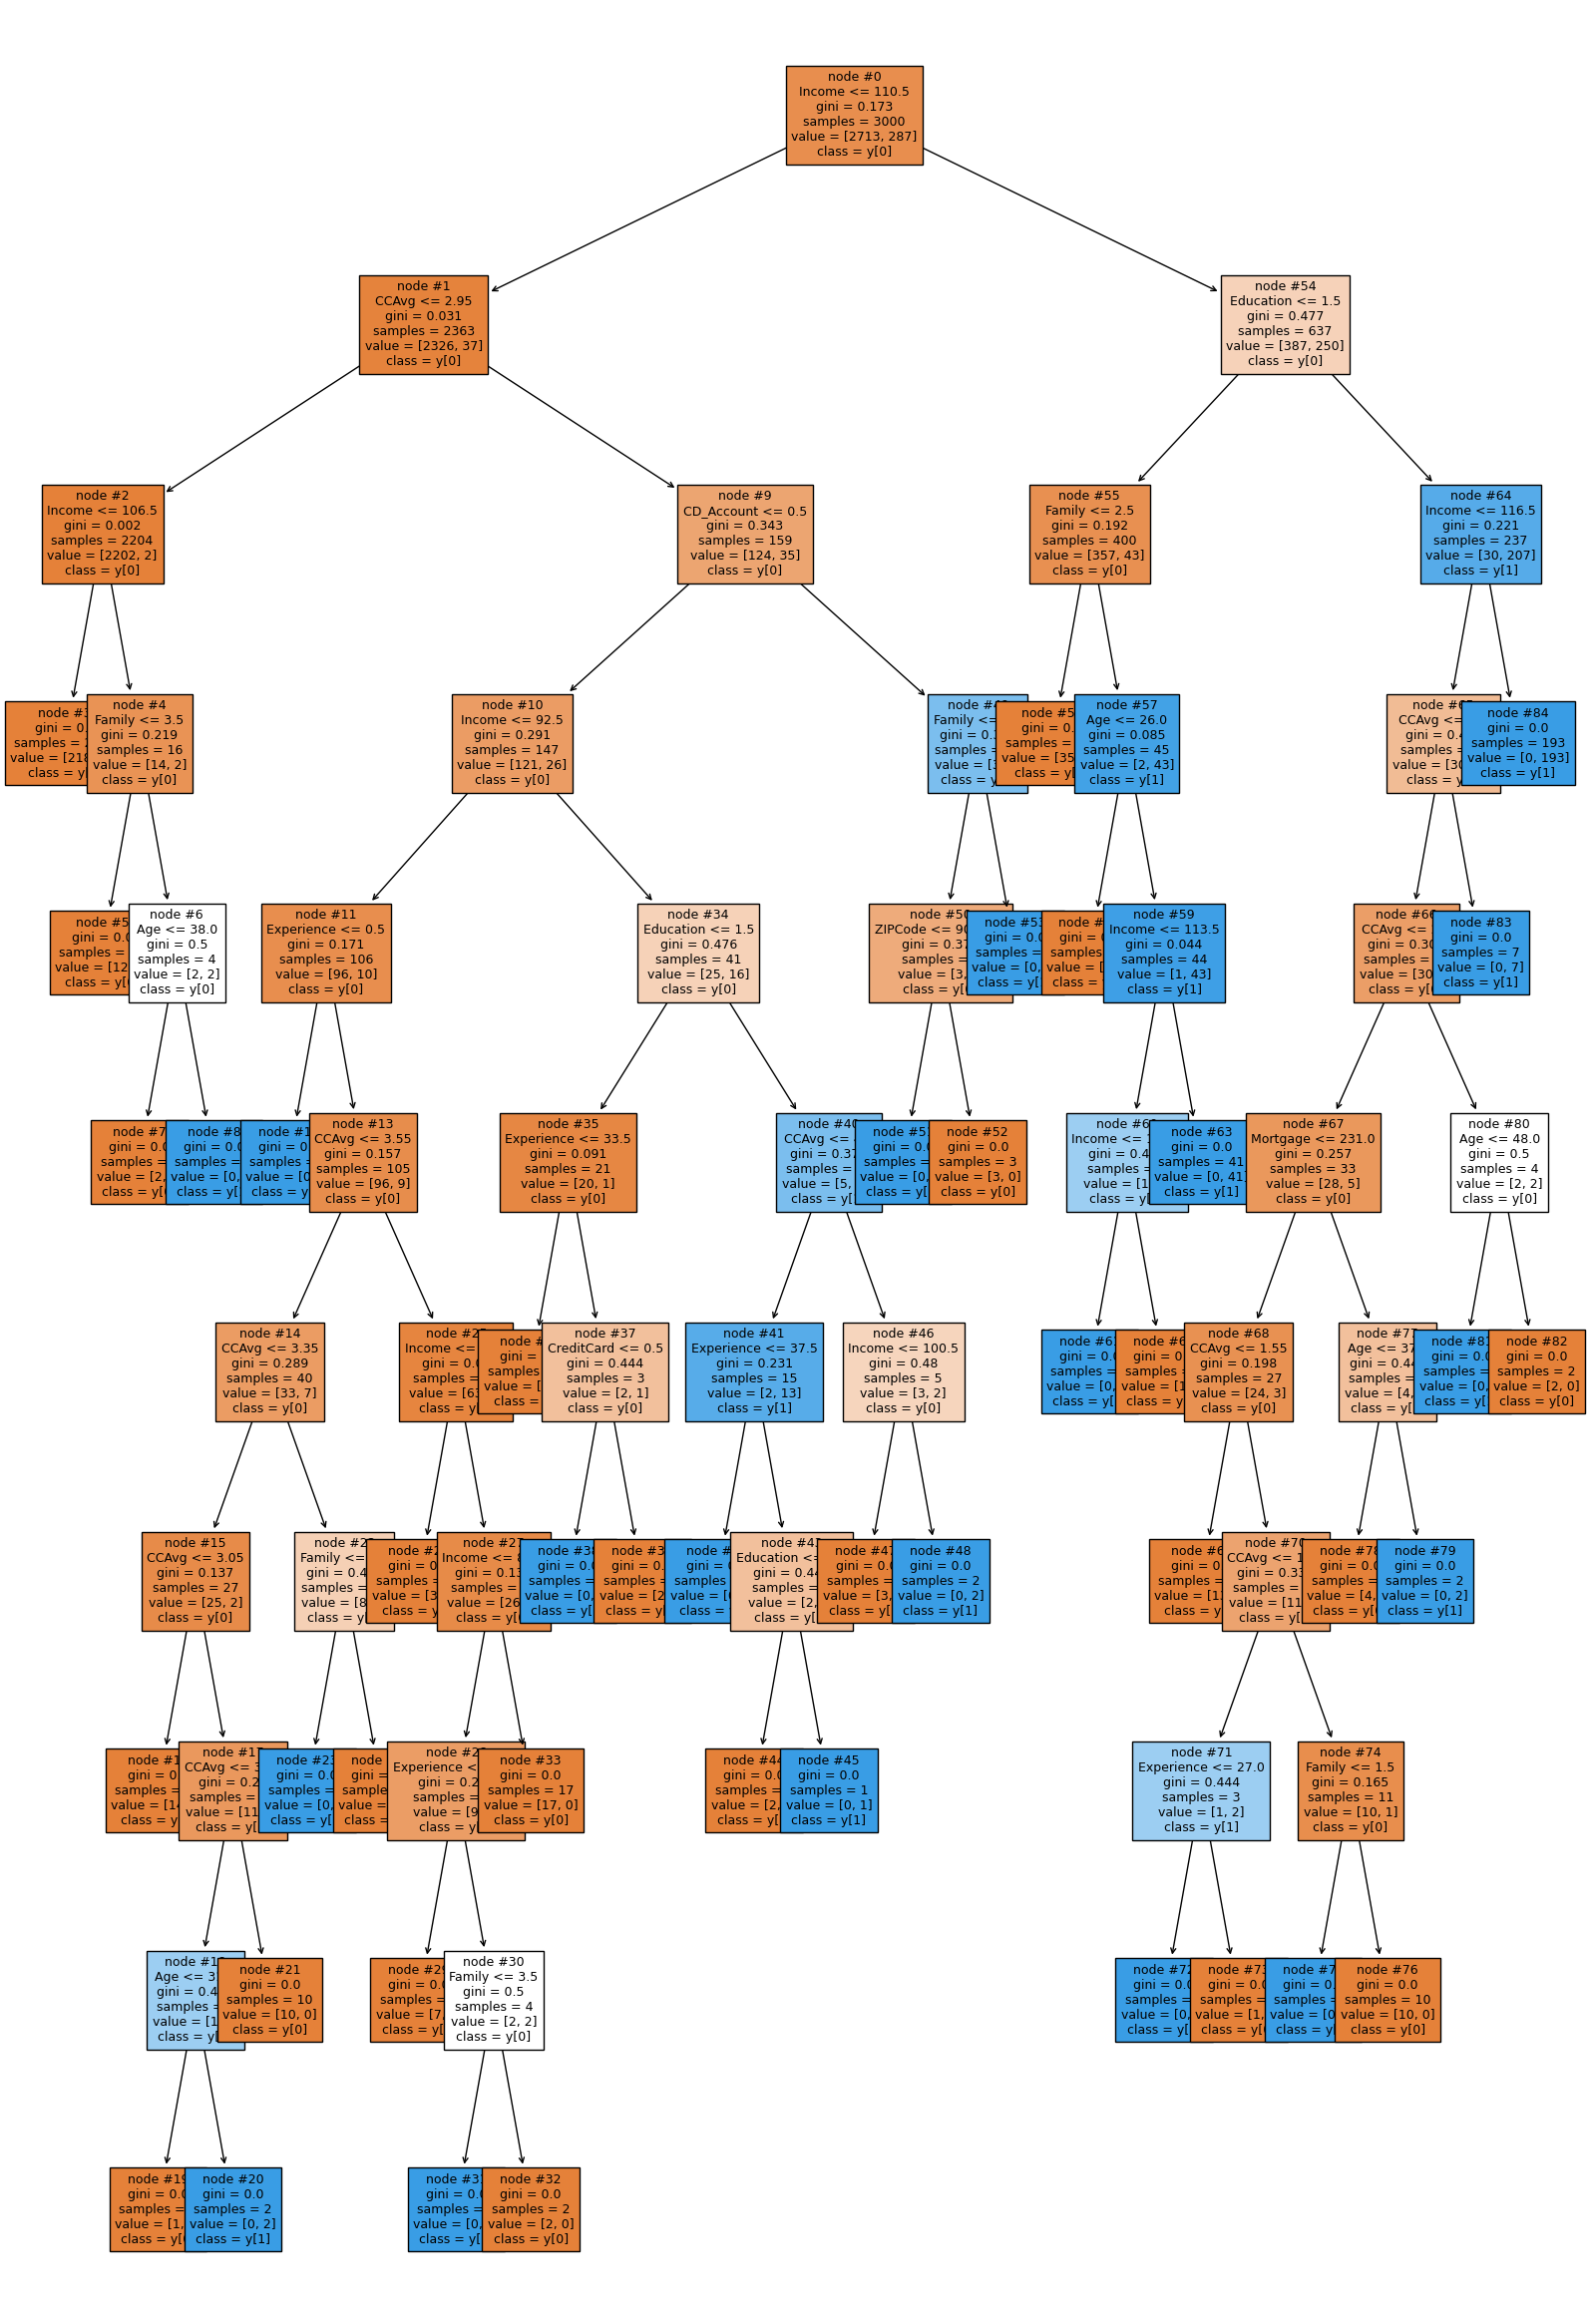

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Age >  38.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |  

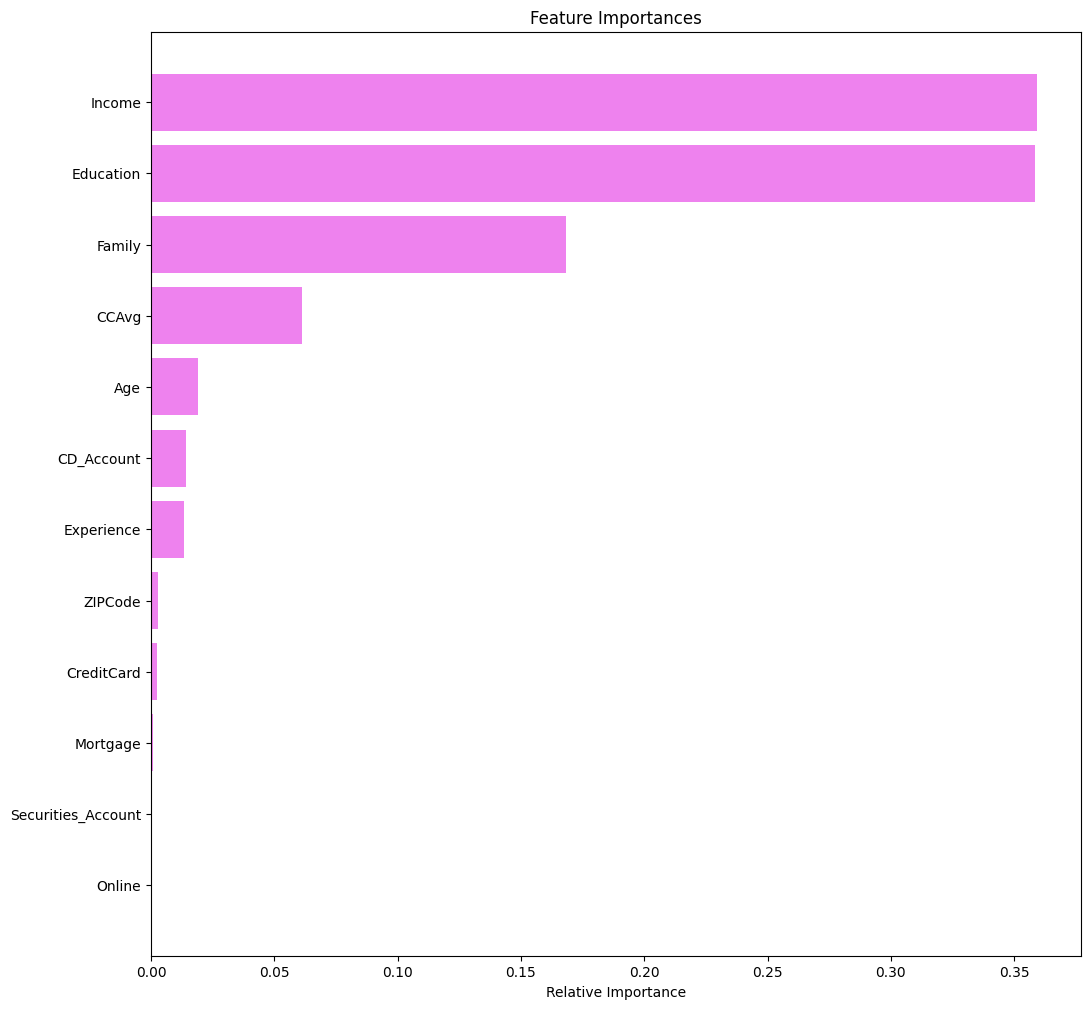

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Education and number of family members are the 3 top important features which can help to determine if the customer will take a personal loan or not.

### Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model

* Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1)

#### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

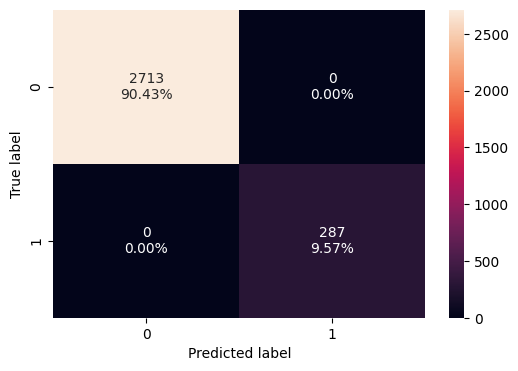

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

Summary
* The model shows slightly reduced performance metrics compared to the non-tuned model but avoids overfitting and provides a more realistic assessment.
* The tuned model achieves high precision and recall, ensuring a good balance between identifying true positives and minimizing false positives and negatives.

#### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.97800 0.86528    0.90270 0.88360

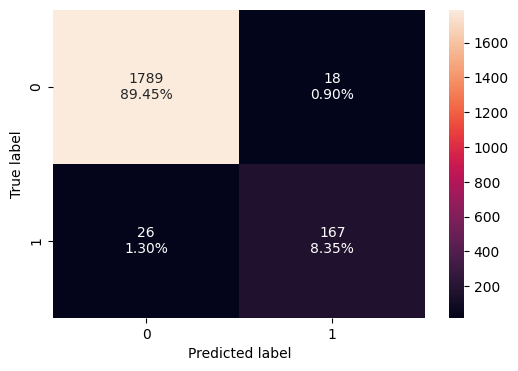

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

Summary:
The model performs well on the test set with higher accuracy and balanced precision and recall, indicating that it generalizes well to unseen data and is effective at predicting customer behavior regarding personal loan acceptance.

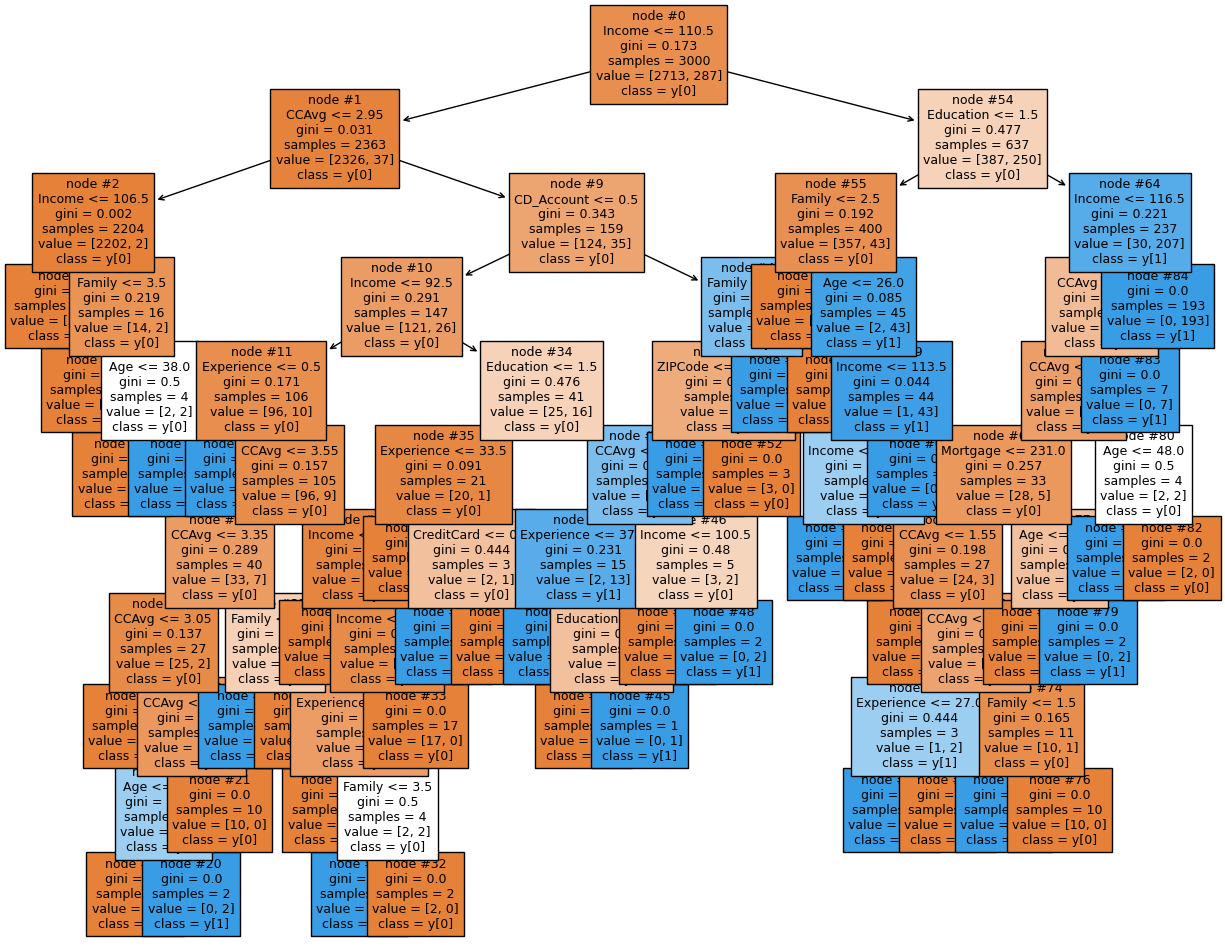

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

#### Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.00000     0.00000
1      0.00032     0.00063
2      0.00032     0.00193
3      0.00033     0.00258
4      0.00041     0.00381
5      0.00044     0.00515
6      0.00044     0.00559
7      0.00044     0.00737
8      0.00050     0.00787
9      0.00050     0.00987
10     0.00062     0.01050
11     0.00069     0.01255
12     0.00088     0.01606
13     0.00100     0.01706
14     0.00251     0.02459
15     0.00258     0.02717
16     0.00475     0.03192
17     0.01110     0.04302
18     0.02431     0.06733
19     0.05285     0.17303

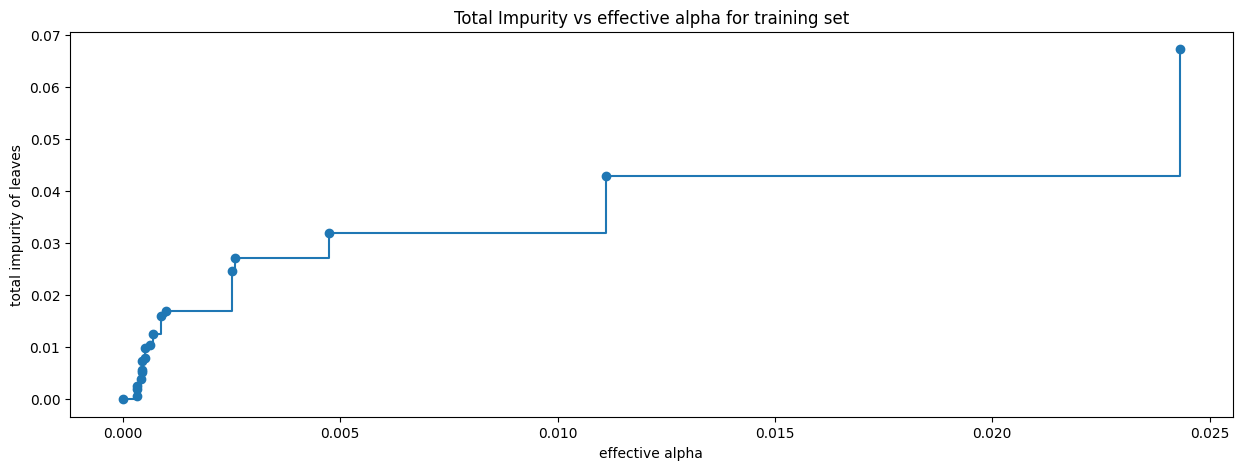

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05284766110239135


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

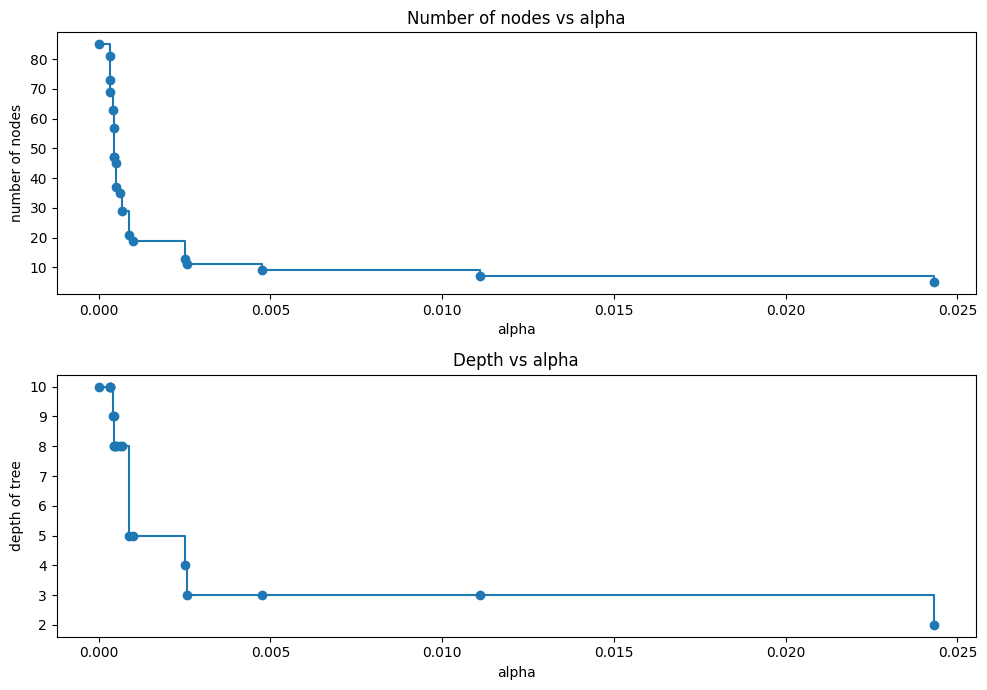

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

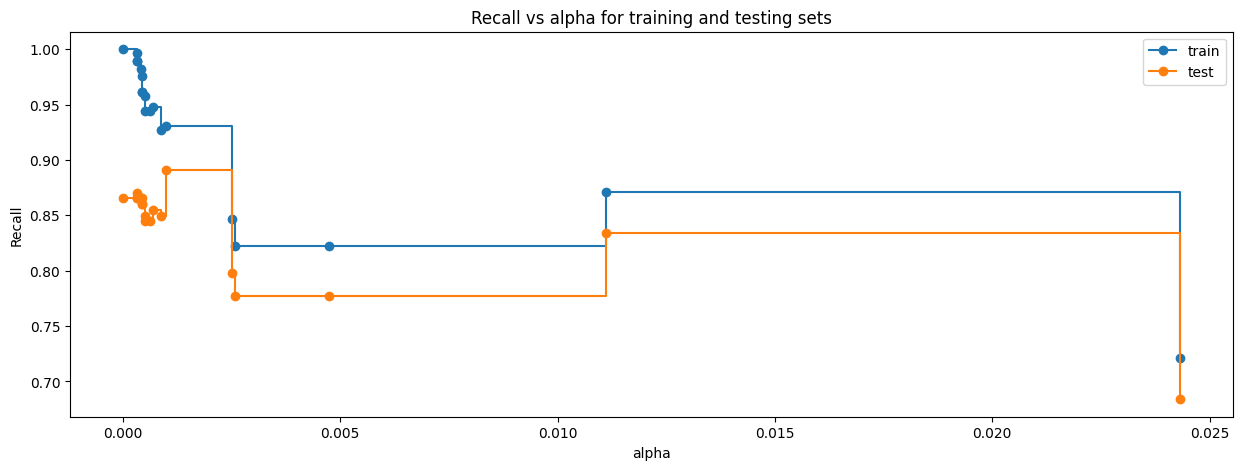

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=1)


#### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.99000 0.93031    0.96390 0.94681

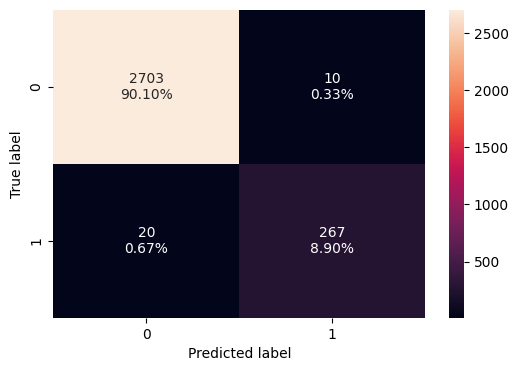

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.98250 0.89119    0.92473 0.90765

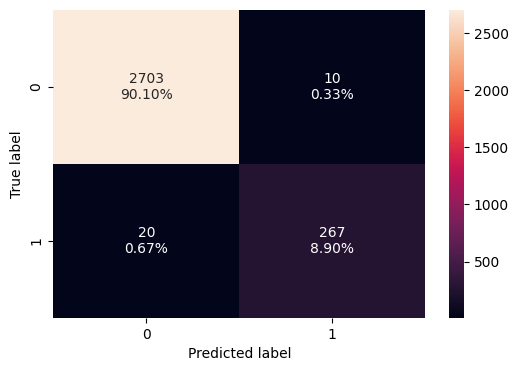

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

#### Visualizing the Decision Tree

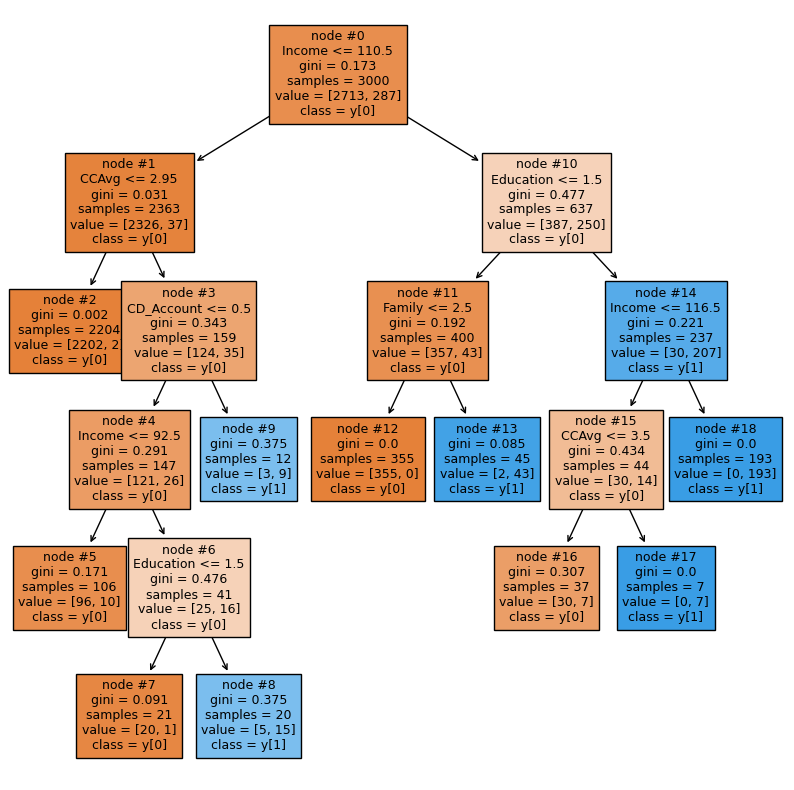

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 15.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 43.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 3.50
|   |   |   |   |--- weights: [30.00, 7.00] class: 0
|   |   |   |--- CCAvg >  3.50
|   |   |   |   |--- weights: [0.00, 7.00] class: 1
|   |   |--- Income >  116.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Education          0.39478
Income             0.38677
Family             0.15587
CCAvg              0.04700
CD_Account         0.01558
ZIPCode            0.00000
Age                0.00000
Experience         0.00000
Mortgage           0.00000
Securities_Account 0.00000
Online             0.00000
CreditCard         0.00000


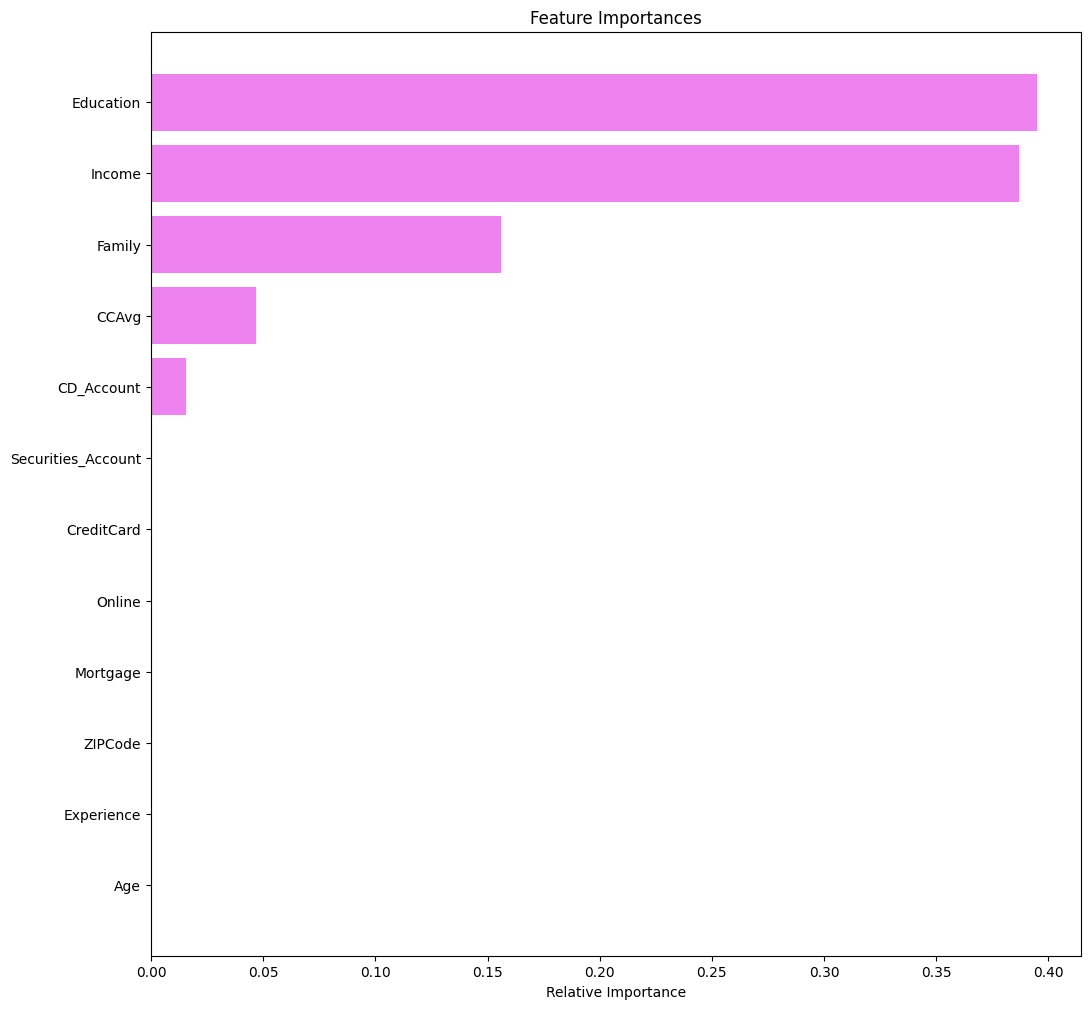

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education, Income and Family continues to remain the most important features with post-pruning.
* However this time Education has become the top feature when compared to earlier feature which was income.

### Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 1.00000                      1.00000   
Recall                   1.00000                      1.00000   
Precision                1.00000                      1.00000   
F1                       1.00000                      1.00000   

           Decision Tree (Post-Pruning)  
Accuracy                        0.99000  
Recall                          0.93031  
Precision                       0.96390  
F1                              0.94681

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.97800                      0.97800   
Recall                   0.86528                      0.86528   
Precision                0.90270                      0.90270   
F1                       0.88360                      0.88360   

           Decision Tree (Post-Pruning)  
Accuracy                        0.98250  
Recall                          0.89119  
Precision                       0.92473  
F1                              0.90765

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Conclusions and Recommendations

* Personal_Loan and CCAvg, suggesting that customers who spend more on credit cards are more likely to accept personal loans.

* There is a moderate positive correlation between having a CD account and accepting a personal loan, indicating that customers with CD accounts may be more inclined to accept personal loans.

* We can also see (from cell 93) that family with 3 or 4 members and where income is over $120K, there is a high chance of accepting personal loan

* Customers with higher income and average credit card spending tend to accept personal loans.

* Target customers who are already using online banking and credit cards from other banks.

* Focus on marketing campaigns to graduates and professionals, as higher education levels show a positive correlation with loan acceptance.